This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

# 1.Question
  You used two hidden layers. Try using one or three hidden layers, and see how doing so 
affects validation and test accuracy.   


**Model definition**

Model construction with 2,3,and 4 layers

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model_Layer2= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_Layer3= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_Layer4= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])



**Compiling the model**

In [10]:
model_Layer2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_Layer3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_Layer4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [12]:
history_Layer2 = model_Layer2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_Layer3 = model_Layer3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_Layer4 = model_Layer4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.4829 - accuracy: 0.8014 - val_loss: 0.3735 - val_accuracy: 0.8744
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3042 - accuracy: 0.9050 - val_loss: 0.3105 - val_accuracy: 0.8866
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2383 - accuracy: 0.9241 - val_loss: 0.2943 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1949 - accuracy: 0.9405 - val_loss: 0.2761 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1662 - accuracy: 0.9498 - val_loss: 0.2832 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1431 - accuracy: 0.9589 - val_loss: 0.2767 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1249 - accuracy: 0.9645 - val_loss: 0.2823 - val_accuracy: 0.8854
Epoch 8/20
30

In [13]:
model_Layer2.summary()
model_Layer3.summary()
model_Layer4.summary()

# It provides the information on the three model's training loss  and accuracy ,as well as their validation loss and accuracy
history_dictLayer2 = history_Layer2.history
history_dictLayer3 = history_Layer3.history
history_dictLayer4 = history_Layer4.history


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                160016    
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)            

**Plotting the training and validation loss**

No handles with labels found to put in legend.


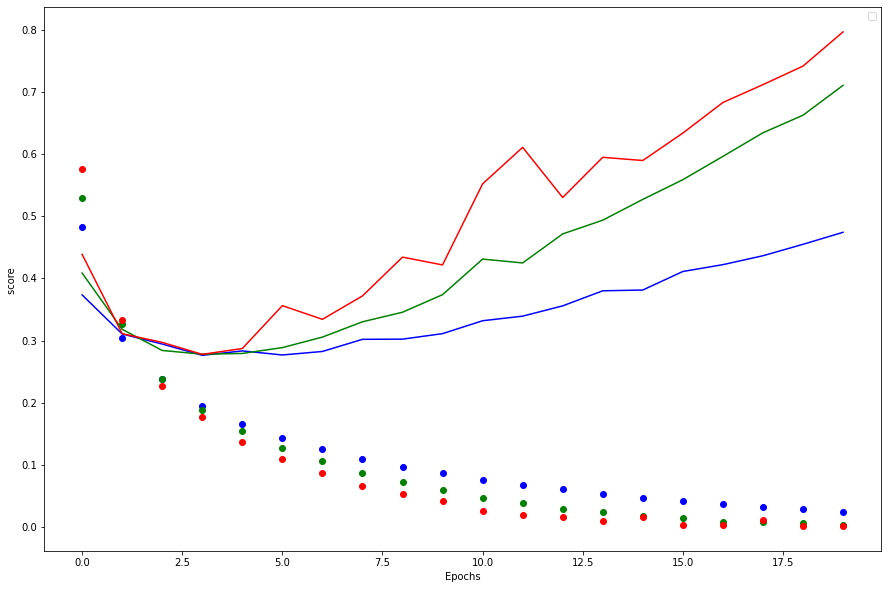

In [14]:
import matplotlib.pyplot as plt
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)

plt.plot(history_dictLayer2['val_loss'],'b',history_dictLayer3['val_loss'],'g',history_dictLayer4['val_loss'],'r')
plt.plot(history_dictLayer2['loss'],'b',history_dictLayer3['loss'],'g',history_dictLayer4['loss'],'r',marker='o',linestyle='None')
plt.xlabel("Epochs")
plt.ylabel("score ")
plt.legend()
plt.show()


**Plotting the training and validation accuracy**

No handles with labels found to put in legend.


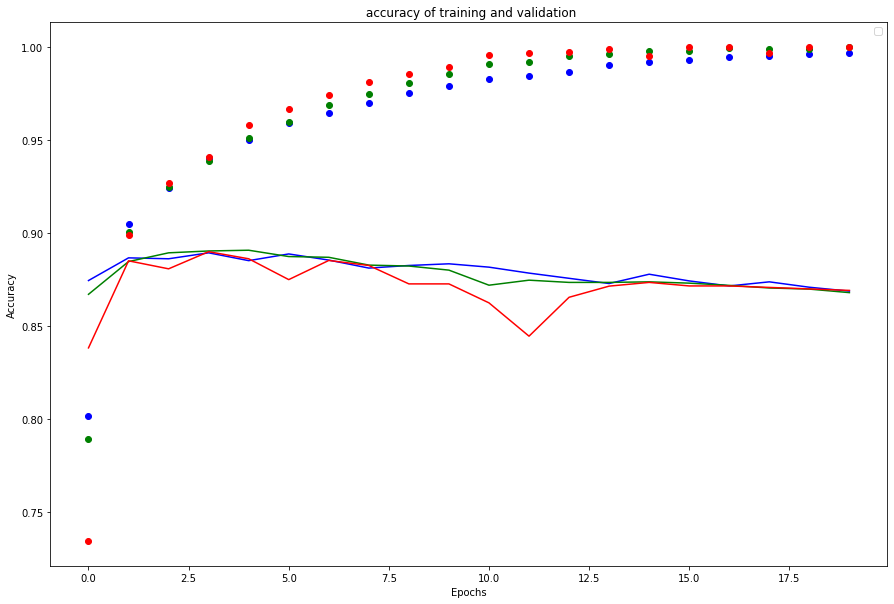

In [15]:
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)

plt.plot(history_dictLayer2['val_accuracy'],'b',history_dictLayer3['val_accuracy'],'g',history_dictLayer4['val_accuracy'],'r')
plt.plot(history_dictLayer2['accuracy'],'b',history_dictLayer3['accuracy'],'g',history_dictLayer4['accuracy'],'r',marker='o',linestyle='None')
plt.title(" accuracy of training and validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Summary:
when the number of hidden layers  is lowered it has a direct impact on the network accuracy since with a difficult problem,a network with fewer hidden  layers may not be successful trained .when the number of hidden layers  exceed the ideal  amount (Three) time complexity is increases by orders of magnitude in comparison to accuracy improvement .Techniques  with fewer than the  three hidden layers  suffered from loss of accuracy ,where as architectures with more than  three hidden layers  were shown to  be inefficient in the terms of time complexity

# #2.Question
Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.  


**Retraining a model from scratch**

In [16]:
model_Layer4Hidden = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_Layer4Hidden.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Layer4Hidden = model_Layer4Hidden.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 4s 116ms/step - loss: 0.4876 - accuracy: 0.7658 - val_loss: 0.4982 - val_accuracy: 0.7663
Epoch 2/20
30/30 [==============================] - 3s 106ms/step - loss: 0.2700 - accuracy: 0.9018 - val_loss: 0.3577 - val_accuracy: 0.8502
Epoch 3/20
30/30 [==============================] - 3s 116ms/step - loss: 0.1911 - accuracy: 0.9326 - val_loss: 0.3262 - val_accuracy: 0.8699
Epoch 4/20
30/30 [==============================] - 3s 110ms/step - loss: 0.1443 - accuracy: 0.9510 - val_loss: 0.2862 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1117 - accuracy: 0.9614 - val_loss: 0.3040 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0797 - accuracy: 0.9750 - val_loss: 0.3371 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0582 - accuracy: 0.9832 - val_loss: 0.3638 - val_accuracy: 0.8825
Epoch 8/2

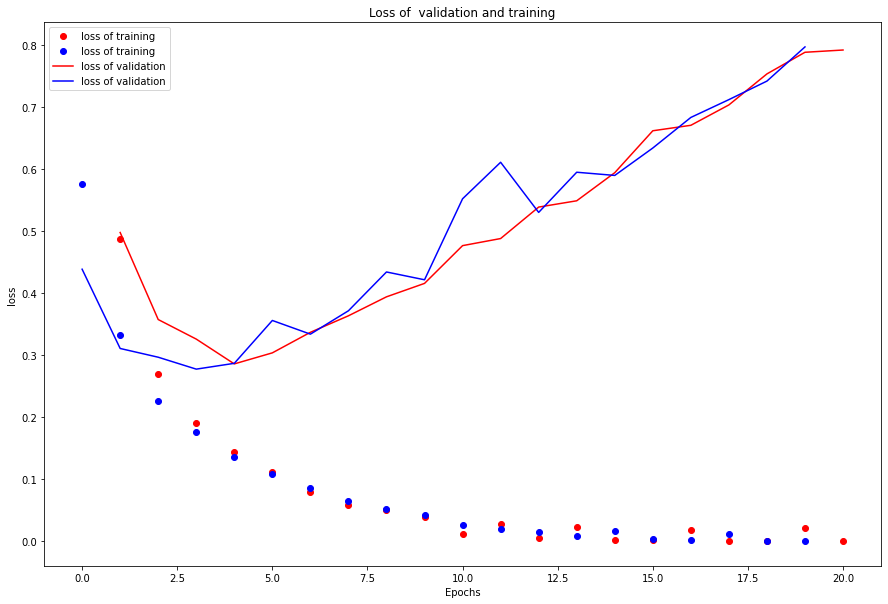

In [17]:

history_dict_Layer4Hidden=history_Layer4Hidden.history
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)

#Values_lossing =history_dict_Layer4Hidden["loss"]
#val_values_lossing = history_dict_Layer4Hidden["val_loss"]
epochs = range(1, len(history_dict_Layer4Hidden["loss"])+ 1)
plt.plot(epochs, history_dict_Layer4Hidden["loss"],"ro",history_dictLayer4['loss'],'bo',label="loss of training")
plt.plot(epochs, history_dict_Layer4Hidden["val_loss"],"r",history_dictLayer4['val_loss'],'b' , label="loss of validation")
plt.title("Loss of  validation and training")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()


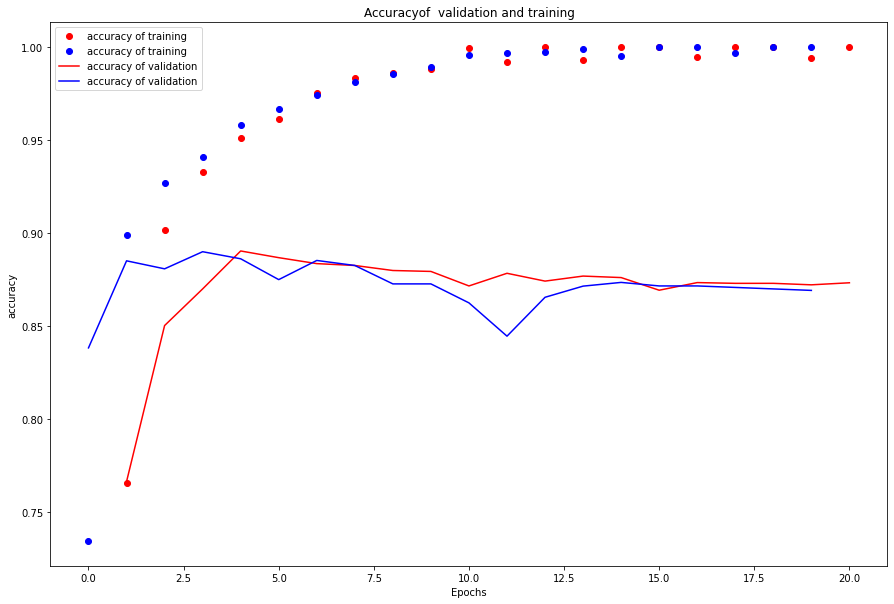

In [18]:
# This pot compares the two-three layers  models with various node counts.
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)

plt.clf()
#accuracy = history_dict_Layer4Hidden["acc"]
#val_accuracy = history_dict_Layer4Hidden["val_acc"]
plt.plot(epochs, history_dict_Layer4Hidden["accuracy"],"ro",history_dictLayer4['accuracy'],'bo', label="accuracy of training")
plt.plot(epochs, history_dict_Layer4Hidden["val_accuracy"],"r",history_dictLayer4['val_accuracy'],'b' , label="accuracy of validation")
plt.title("Accuracyof  validation and training")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()


summary :Due  to underfitting  and statistial bias ,using  a few hidden units  will result in high  training error  and generalization error and beacuse of overfitting  and excessive  variation ,using too many  hidden units might  result in low  training error  but high generalization  error.

# **3.Question**
Try using the mse loss function instead of binary_crossentropy.   

In [19]:
model_Layer4Hidden = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_Layer4Hidden.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Layer4Hidden = model_Layer4Hidden.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val,y_val))
history_dict_Layer4Hidden = history_Layer4Hidden.history


Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.1714 - accuracy: 0.7879 - val_loss: 0.1213 - val_accuracy: 0.8730
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0929 - accuracy: 0.9063 - val_loss: 0.1001 - val_accuracy: 0.8731
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0664 - accuracy: 0.9298 - val_loss: 0.0987 - val_accuracy: 0.8657
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0517 - accuracy: 0.9444 - val_loss: 0.0827 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0413 - accuracy: 0.9579 - val_loss: 0.0867 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0342 - accuracy: 0.9655 - val_loss: 0.0835 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0278 - accuracy: 0.9736 - val_loss: 0.0857 - val_accuracy: 0.8821
Epoch 8/20
30

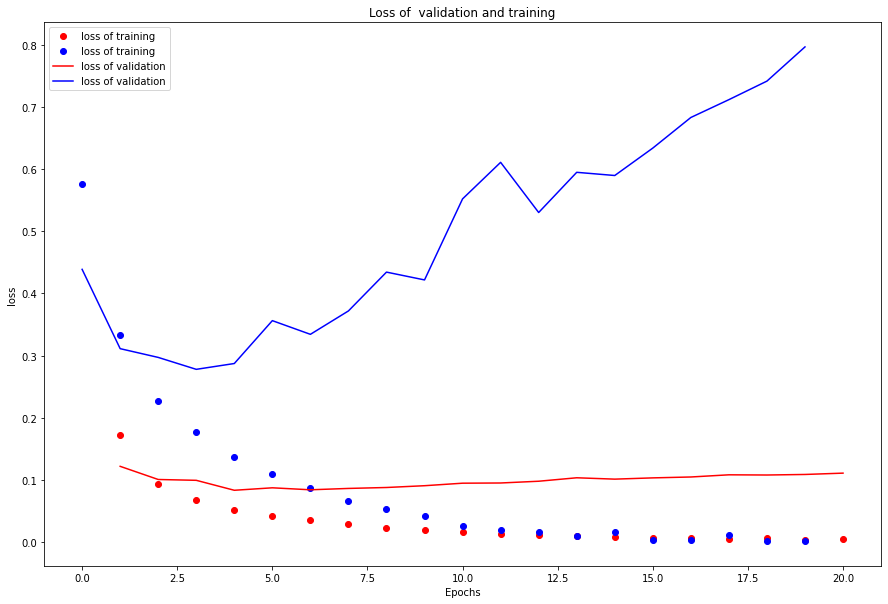

In [20]:
# plotting The training and validation  losses  for two models with different loss functions 

s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)
#Values_lossing =history_dict_Layer4Hidden["loss"]
#val_values_lossing = history_dict_Layer4Hidden["val_loss"]
epochs = range(1, len(history_dict_Layer4Hidden["loss"])+ 1)
plt.plot(epochs, history_dict_Layer4Hidden["loss"],"ro",history_dictLayer4['loss'],'bo',label="loss of training")
plt.plot(epochs, history_dict_Layer4Hidden["val_loss"],"r",history_dictLayer4['val_loss'],'b' , label="loss of validation")
plt.title("Loss of  validation and training")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()


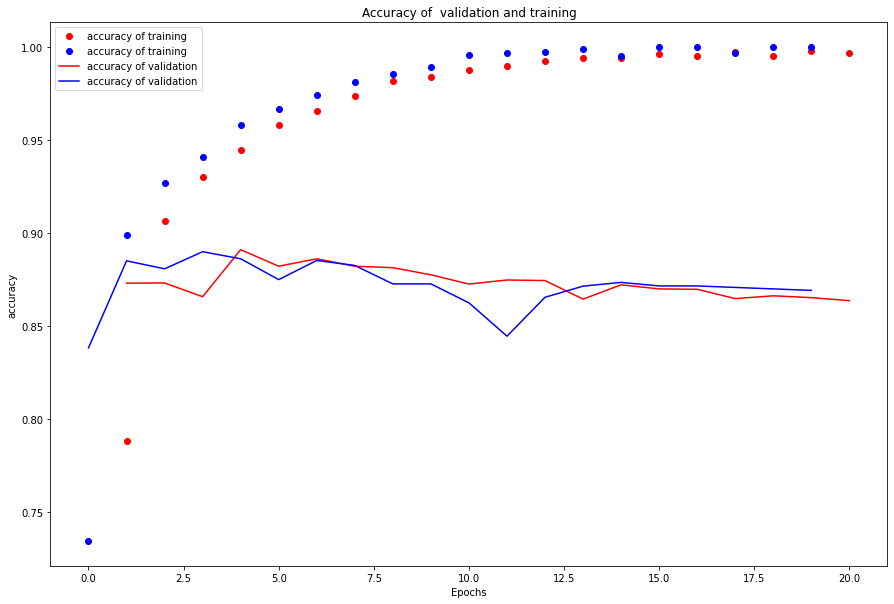

In [21]:
# plotting The training and validation  accuracy  for two models with different loss functions 
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)

plt.clf()
#accuracy = history_dict_Layer4Hidden["acc"]
#val_accuracy = history_dict_Layer4Hidden["val_acc"]
plt.plot(epochs, history_dict_Layer4Hidden["accuracy"],"ro",history_dictLayer4['accuracy'],'bo', label="accuracy of training")
plt.plot(epochs, history_dict_Layer4Hidden["val_accuracy"],"r",history_dictLayer4['val_accuracy'],'b' , label="accuracy of validation")
plt.title("Accuracy of  validation and training")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

summary:If the network  features sigmod or softmax nonlinearity, cross-entropy is the best/optimal method  to utilize in the output layer ,we can use MSE  instead if we assume the  objective is  continuous  and reguraly distributed and we need to  maximize the  likelihood of the net output under these assumptions,for this  the cross entropy rather than the MSE is a better choice  for categorization.

# 4 Question
Try using the tanh activation (an activation that was popular in the early days of neural 
networks) instead of relu.  

In [22]:
model_tanh= keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_tanh = model_tanh.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1566 - accuracy: 0.7883 - val_loss: 0.1085 - val_accuracy: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0797 - accuracy: 0.9069 - val_loss: 0.0855 - val_accuracy: 0.8907
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0543 - accuracy: 0.9344 - val_loss: 0.0832 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0399 - accuracy: 0.9548 - val_loss: 0.0839 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0313 - accuracy: 0.9643 - val_loss: 0.0876 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0242 - accuracy: 0.9727 - val_loss: 0.0981 - val_accuracy: 0.8734
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0195 - accuracy: 0.9782 - val_loss: 0.0970 - val_accuracy: 0.8781
Epoch 8/20
30

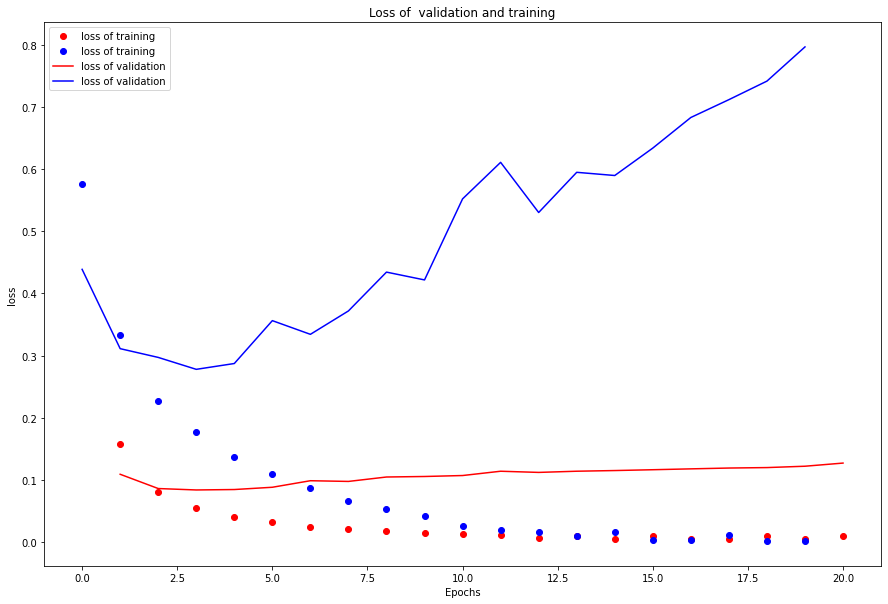

In [23]:
history_dict_tanh = history_tanh.history
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)

#Values_lossing =history_dict_tanh["loss"]
#val_values_lossing = history_dict_tanh["val_loss"]

epochs = range(1, len(history_dict_tanh["loss"])+ 1)
plt.plot(epochs, history_dict_tanh["loss"],"ro",history_dictLayer4['loss'],'bo',label="loss of training")
plt.plot(epochs, history_dict_tanh["val_loss"],"r",history_dictLayer4['val_loss'],'b' , label="loss of validation")
plt.title("Loss of  validation and training")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

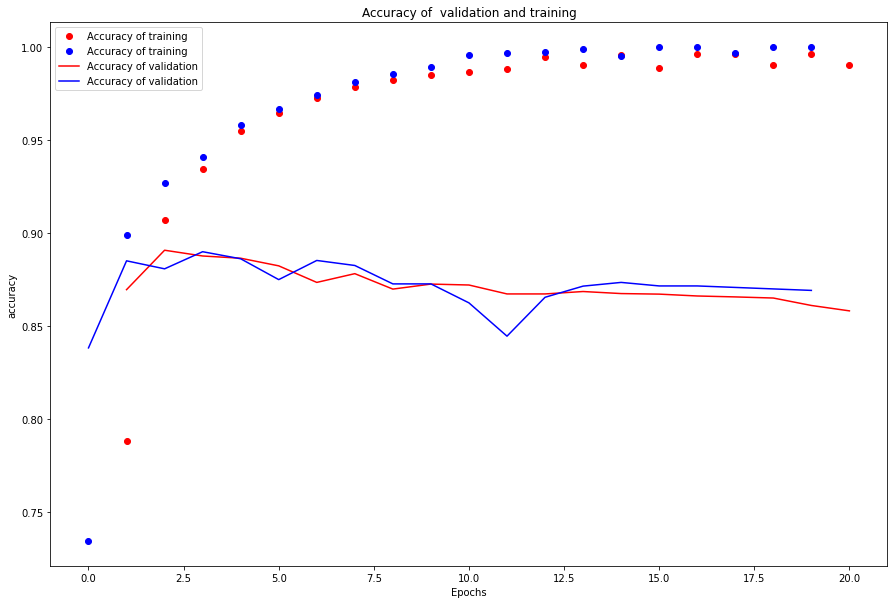

In [24]:
history_dict_tanh = history_tanh.history
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)
#Values_lossing =history_dict_tanh["loss"]
#val_values_lossing = history_dict_tanh["val_loss"]
plt.clf()
plt.plot(epochs, history_dict_tanh["accuracy"],"ro",history_dictLayer4['accuracy'],'bo',label="Accuracy of training")
plt.plot(epochs, history_dict_tanh["val_accuracy"],"r",history_dictLayer4['val_accuracy'],'b' , label="Accuracy of validation")
plt.title("Accuracy of  validation and training")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

summary: Tanh's validation  accuracy  flucates more  than the relu's  and the loss of  validity is  constant in tanh, where as relu's validation accuracy  surged at one point and then began to decline.

# 5 Question
Use any technique we studied in class, and these include regularization, dropout, etc., to 
get your model to perform better on validation. 

In [25]:
model_new= keras.Sequential([
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_new.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_new = model_new.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,validation_data=(x_val,y_val))




Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5665 - accuracy: 0.7455 - val_loss: 0.4336 - val_accuracy: 0.8414
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3559 - accuracy: 0.8791 - val_loss: 0.3278 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2558 - accuracy: 0.9139 - val_loss: 0.2853 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2019 - accuracy: 0.9313 - val_loss: 0.2760 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1622 - accuracy: 0.9460 - val_loss: 0.2819 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1342 - accuracy: 0.9575 - val_loss: 0.3212 - val_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1091 - accuracy: 0.9663 - val_loss: 0.3060 - val_accuracy: 0.8854
Epoch 8/20
30

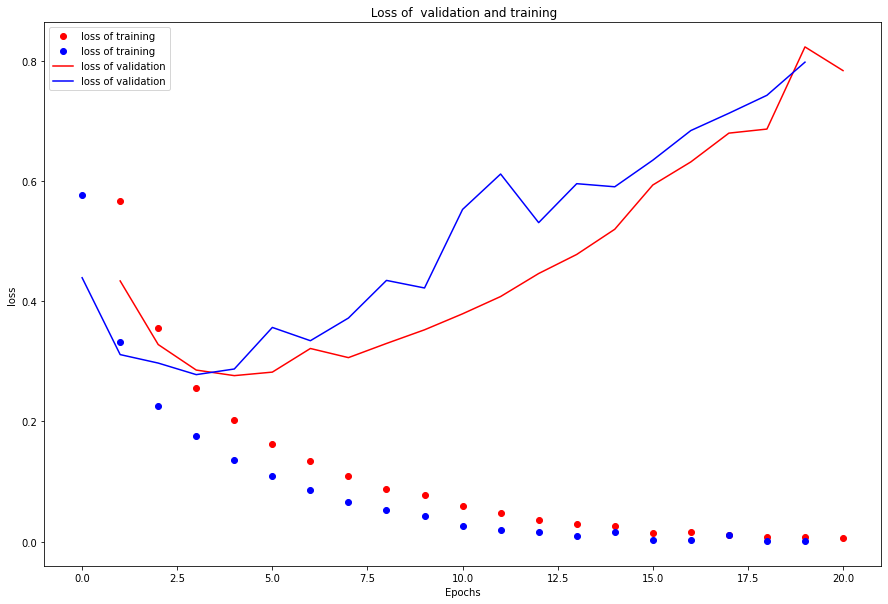

In [26]:
history_dict_new = history_new.history
s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)
#Values_lossing =history_dict_new["loss"]
#val_values_lossing = history_dict_new["val_loss"]
epochs = range(1, len(history_dict_new["loss"])+ 1)
plt.plot(epochs, history_dict_new["loss"],"ro",history_dictLayer4['loss'],'bo',label="loss of training")
plt.plot(epochs, history_dict_new["val_loss"],"r",history_dictLayer4['val_loss'],'b' , label="loss of validation")
plt.title(" Loss of  validation and training")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

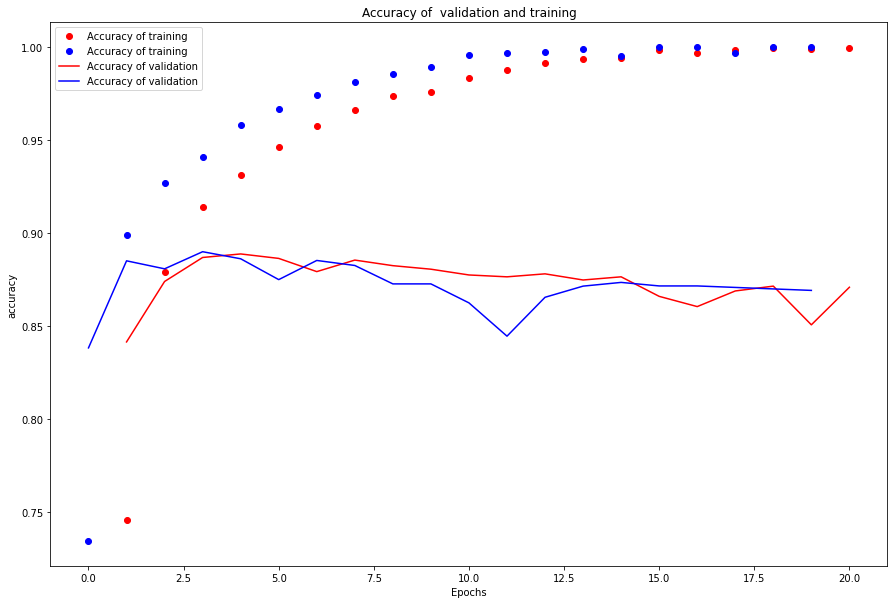

In [27]:

s = plt.figure()
s.set_figwidth(15)
s.set_figheight(10)
#Values_lossing =history_dict_new["loss"]
#val_values_lossing = history_dict_new["val_loss"]
plt.clf()
plt.plot(epochs, history_dict_new["accuracy"],"ro",history_dictLayer4['accuracy'],'bo',label="Accuracy of training")
plt.plot(epochs, history_dict_new["val_accuracy"],"r",history_dictLayer4['val_accuracy'],'b' , label="Accuracy of validation")
plt.title("Accuracy of  validation and training")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

Summary:Because of the dropout is set to 0.1 ,the values  after the epoch 6 the values begin to decrease ,then gradually increase a slight .Then after epoch 9 ,it continues  to fall.